<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab: Pivot Charts**


Estimated time needed: **30** minutes


## Introduction
In this lab, you will learn how to use pivot charts for data analysis. Pivot charts play a crucial role in data analytics by enabling quick and intuitive exploration of multidimensional datasets. They allow analysts to summarize and visualize complex data relationships across multiple variables, facilitating insights that might be obscured in raw data tables. By dynamically aggregating and pivoting data, these charts provide a comprehensive view of trends, patterns, and correlations, empowering decision-makers to identify key factors influencing outcomes. Pivot charts enhance data-driven decision-making processes by simplifying complex data into actionable visual representations, thereby accelerating understanding and fostering informed strategies in diverse fields such as business analytics, market research, and scientific studies.


## Objectives

After completing this lab you will be able to:

 - Use Pivot charts for data analytics
 - Use different types of charts for different scenarios
 - Make deeper inferences from data based on the pivoted representations


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`sqlite3`](https://docs.python.org/3/library/sqlite3.html) for accessing the database


### Installing Required Libraries

Execute the following code to install the required libraries on the interface


In [2]:
%pip install pandas seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 106.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 122.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 101.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 117.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 111.8 MB/s eta 0:00:0000:01
   ━━━

### Importing Required Libraries

All libraries required for the codes below should be imported here.


In [3]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

### Download the database
Download the databaset from the cloud server by executing the code statement below.


In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-12-15 12:20:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  36.8MB/s    in 1.0s    

2024-12-15 12:20:30 (36.8 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Load the database and read the data table as a Pandas dataframe for further usage, by executing the following code.


In [5]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection
QUERY = """SELECT * FROM master"""
df = pd.read_sql(QUERY,conn)

### Scenario 1: Distribution of Respondents by Career Satisfaction and Job Satisfaction


In the first task, you can plot a distribution of the distribution of the respondents in terms of their Career Satisfaction and Job satisfaction. For this, we need to create a pivot with one of the axis representing unique values of `CareerSat` field, another axis representing `JobSat` values, and the data to be shown under each map to be set as the count of respondents. To achieve this, you can execute the code block shared below.


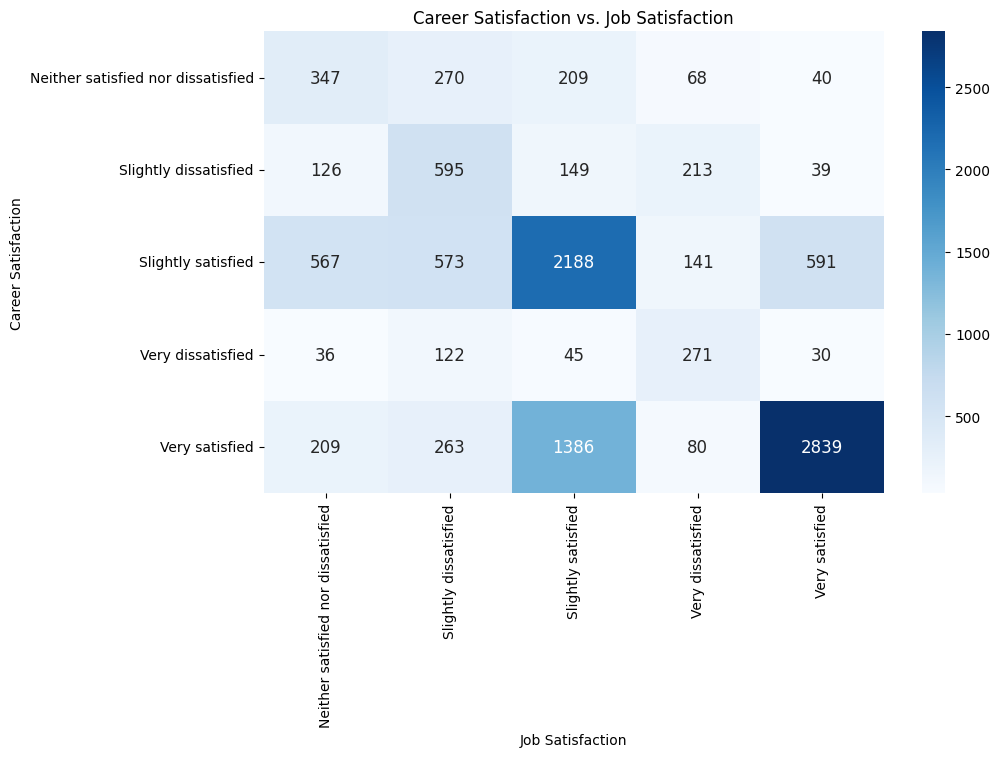

In [10]:
# Create pivot_table
pivot_table = pd.pivot_table(df, 
                             index='CareerSat', # Specifies the column to be used as row labels in the pivot table
                             columns='JobSat', # Specifies the column to be used as column labels in the pivot table.
                             values='Respondent', # Specifies the column to be aggregated. 
                             aggfunc='count', # # Specifies the aggregation function to be used.
                             fill_value=0) # Fills missing values in the pivot table with 0. This ensures that all cells have a value.
# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, 
            annot=True, # tells the function to annotate each cell with its corresponding value.
            annot_kws = {'fontsize': 12}, # Adjust font size
            cmap='Blues', #specifies the color palette to use for the heatmap.
            fmt='g') # controls the formatting of the annotations. 
                    ## 'g' stands for general format, which automatically selects the appropriate format (e.g., integer, float) for each value.

plt.title('Career Satisfaction vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')
plt.show()

#### Inference:
Using a heatmap to visualize the relationship between career satisfaction and job satisfaction provides a clear overview of satisfaction levels across different dimensions. We can see that people 'Very Satisfied' with their current jobs are also 'Very Satisfied' with their careers.


### Scenario 2: Comparison of Open Source Adoption Across Operating Systems
In this scenario, you can visualize the adoption of Open Sourse systems across different operating systems by the respondents. To create this pivot chart, the `index` parameter, representing the x-axis, can be set as `OpSys`and the `columns` parameter can be set as `OpenSource`. The `values` parameter will be set as `Respondent` with aggregation function as `count`. This graph should be plotted as a grouped bar graph.

As a practice exercise, try to complete the code block below to generate the pivot chart yourself. Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.


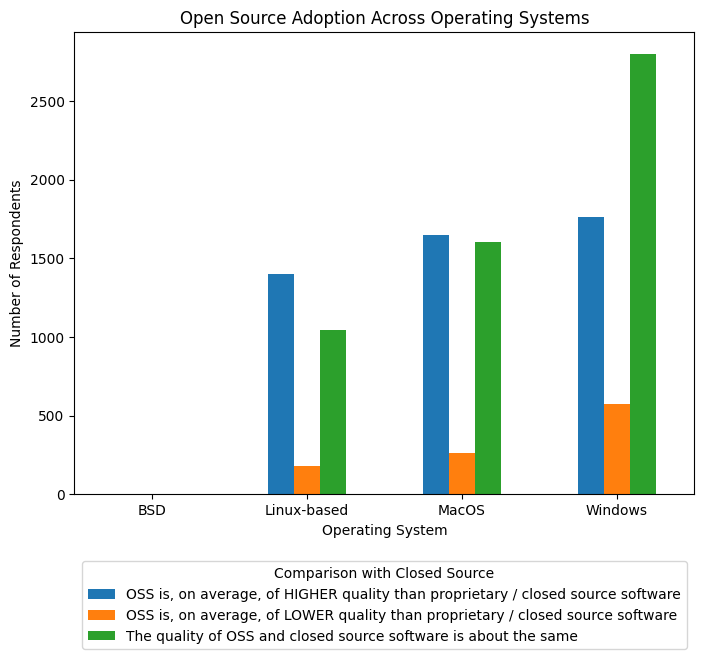

In [22]:
# Create the pivot_table
pivot_table = pd.pivot_table(df,
                             index = 'OpSys',
                             columns = 'OpenSource',
                             values = 'Respondent',
                             aggfunc = 'count',
                             fill_value=0)

# Plotting the grouped bar chart
pivot_table.plot(kind='bar', figsize=(8,6))
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source',loc='lower center', bbox_to_anchor=(0.5, -0.35)) # Move the legend to the bottom center
plt.xticks(rotation=0)

plt.show()

<details><Summary>Click here for the solution</Summary>

```python
pivot_table = pd.pivot_table(df, index='Opr', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar')
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source')
plt.xticks(rotation=0)
plt.show()
```
</details>


### Scenario 3: Job Satisfaction and Career Aspirations by Employment Status

In this scenario, you can explore a deeper interpretation of the data using Pivot charts. Let us explore how employment status and job satisfaction affects the career aspirations of the respondents. 

For this, you need to create a pivot table with 'Employment' and 'JobSat' fields as index, 'MgrWant' field as columns and 'Respondent' as values with aggregation function as 'count'. Complete the following code block to generate the said pivot chart.

Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.


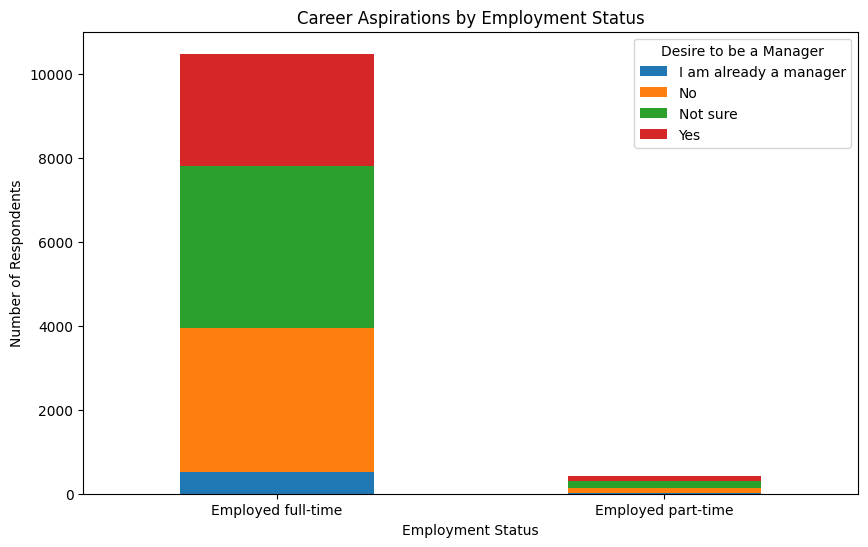

In [60]:
pivot_table = pd.pivot_table(df, 
                             index=['Employment'],
                             columns='MgrWant',
                             values='Respondent',
                             aggfunc='count')                            
# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Desire to be a Manager')
plt.xticks(rotation=0,ha='center')

plt.show()

<details><summary>Click here for solution</summary>

```python
pivot_table = pd.pivot_table(df, index='Employment', columns='MgrWant', values='RespondentID', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', stacked=True)
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Desire to be a Manager')
plt.xticks(rotation=0)
plt.show()
```
</details>


In [62]:
!pip install openpyxl
print('openxyl installed')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 21.0 MB/s eta 0:00:00
openxyl installed


In [63]:
df.to_excel('./data.xlsx', index=False)

### *Quiz*

1. Find the majority of respondents

In [67]:
# First we need to see the list of tables within the database
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [69]:
# The table we need for this task is DevType
QUERY = """
SELECT *
FROM DevType 
"""
devType=pd.read_sql_query(QUERY,conn)
devType.head()

,Respondent,DevType
0,4,"Developer, full-stack"
1,9,Database administrator
2,9,"Developer, back-end"
3,9,"Developer, front-end"
4,9,"Developer, full-stack"


In [74]:
# Find the most popular developer type among the survey responders
QUERY = """
SELECT DevType, COUNT(Respondent) as count
FROM DevType
GROUP BY DevType
ORDER BY count DESC
LIMIT 1
"""
df=pd.read_sql_query(QUERY,conn)
print('Majority of the survey responders are', df['DevType'].values[0])

Majority of the survey responders are Developer, full-stack


2. Based on the Line Chart of **Age** and median **ConvertedComp** for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp?


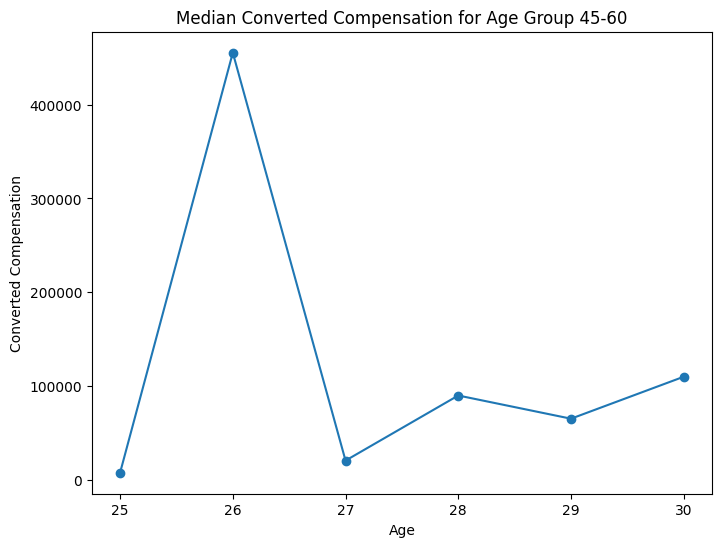

In [77]:
## Plot the median ConvertedComp for all ages from 25 to 30

QUERY = """
SELECT ConvertedComp, Age
FROM master 
WHERE Age BETWEEN 25 AND 30
GROUP BY Age
"""
# Read the query results into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Group data by Age and calculate median values
df_grouped = df.groupby('Age').median()

# Create the line chart
df_grouped.plot(kind='line', figsize=(8,6),marker='o', legend=False)

plt.title('Median Converted Compensation for Age Group 45-60')
plt.xlabel('Age')
plt.xticks(range(25, 31)) # show every age on the x-axis
plt.ylabel('Converted Compensation')

plt.show()

<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|>


Copyright © IBM Corporation. All rights reserved.
